In [2]:
import sys
sys.path.append('../vysxd')
from vysxd_analysis import *
from vysxd_define import *
from transform import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as manimation
from scipy import *

In [3]:
def density_transform(v: float, t: float, x: np.array):
    gamma = 1/np.sqrt(1-v**2)

    t1 = np.zeros(len(x))+t
    x1 = x

    t2 = gamma*(t1 - v*x1)
    x2 = gamma*(x1 - v*t1)
    return t2,x2

In [4]:
p1x1_files = np.sort(os.listdir('data/MS/PHA/p1x1/electrons/')) # Create a sorted list of filenames you will be analyzing
p1x1_temp = vysxd_get_data(f'data/MS/PHA/p1x1/electrons/{p1x1_files[0]}') # pick out the first timestep for reasons
time_prime, x_prime = density_transform(v=0.10,t=p1x1_temp.TIME[0],x=p1x1_temp.X)
density = -np.trapz(p1x1_temp.DATA, axis=0)

for file in p1x1_files[1:]:
    p1x1 = vysxd_get_data(f'data/MS/PHA/p1x1/electrons/{file}') # Pull the phase space data
    time_prime_temp, x_prime_temp = density_transform(v=0.10,t=p1x1.TIME[0],x=p1x1.X)
    density_temp = -np.trapz(p1x1.DATA, axis=0)

    time_prime = np.vstack((time_prime, time_prime_temp))
    x_prime = np.vstack((x_prime, x_prime_temp))
    density = np.vstack((density, density_temp))

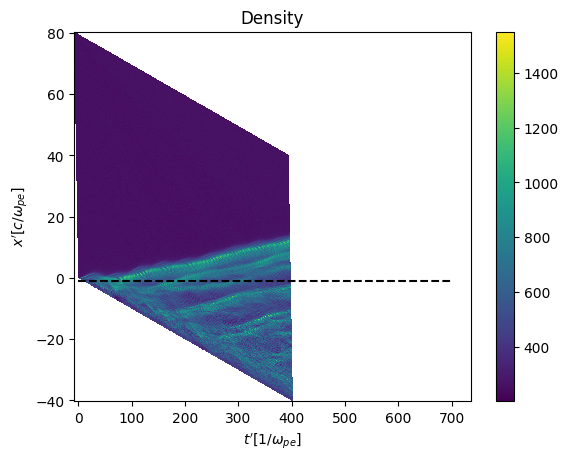

In [5]:
d_min, d_max = np.abs(density).min(), np.abs(density).max()

c = plt.pcolormesh(time_prime,x_prime, density, vmin = d_min, vmax = d_max)
plt.colorbar(c)
plt.ylabel(r'$x^\prime [c/\omega_{pe}]$')
plt.xlabel(r'$t^\prime [1/\omega_{pe}]$')
plt.hlines(-1,0,700, colors = 'black', linestyles= '--')
plt.title('Density')
plt.show()

In [6]:
## pull data

b1_path = 'data/MS/FLD/part_b1/'
b2_path = 'data/MS/FLD/part_b2/'
b3_path = 'data/MS/FLD/part_b3/'


b1= get_osiris_quantity_1d(b1_path)
b1_0 = vysxd_get_data(f'{b1_path}part_b1-000000.h5') ##can use this for easy labeling

b2 = get_osiris_quantity_1d(b2_path)
b2_0 = vysxd_get_data(f'{b2_path}part_b2-000000.h5')

b3 = get_osiris_quantity_1d(b3_path)
b3_0 = vysxd_get_data(f'{b3_path}part_b3-000000.h5')


e1_path = 'data/MS/FLD/part_e1/'
e2_path = 'data/MS/FLD/part_e2/'
e3_path = 'data/MS/FLD/part_e3/'

e1 = get_osiris_quantity_1d(e1_path)
e1_0 = vysxd_get_data(f'{e1_path}part_e1-000000.h5') ##can use this for easy labeling

e2 = get_osiris_quantity_1d(e2_path)
e2_0 = vysxd_get_data(f'{e2_path}part_e2-000000.h5')

e3 = get_osiris_quantity_1d(e3_path)
e3_0 = vysxd_get_data(f'{e3_path}part_e3-000000.h5')

e_density = get_osiris_quantity_1d('data/MS/DENSITY/electrons/charge/')
e_density_0 = vysxd_get_data('data/MS/DENSITY/electrons/charge/charge-electrons-000000.h5')

i_density = get_osiris_quantity_1d('data/MS/DENSITY/ions/charge/')
i_density_0 = vysxd_get_data('data/MS/DENSITY/ions/charge/charge-ions-000000.h5')

e_ufl1 = get_osiris_quantity_1d('data/MS/UDIST/electrons/ufl1/')
e_ufl1_0 = vysxd_get_data('data/MS/UDIST/electrons/ufl1/ufl1-electrons-000000.h5')

i_ufl1 = get_osiris_quantity_1d('data/MS/UDIST/ions/ufl1/')
i_ufl1_0 = vysxd_get_data('data/MS/UDIST/ions/ufl1/ufl1-ions-000000.h5')

# Useful to keep these as global variables
dt, dx, t, x = e1[1], e1[2], e1[3], e1[4]

In [8]:
print(np.shape(e_ufl1[0]))
print(np.shape(t))
print(np.shape(x))

(526, 1024)
(526,)
(1024,)


In [9]:
# write_quantities can be used to integrate shit and then leave it as .npy files that we can load very easily
# note that quantity_ indicates an averaged quantity... I don't know if there is a better practice

e_density_ = np.load("avg_q/e_density.npy")
i_density_ = np.load("avg_q/i_density.npy")

e1_ = np.load("avg_q/e1.npy")
e2_ = np.load("avg_q/e2.npy")
e3_ = np.load("avg_q/e3.npy")

b1_ = np.load("avg_q/b1.npy")
b2_ = np.load("avg_q/b2.npy")
b3_ = np.load("avg_q/b3.npy")

e_ufl1_ = np.load("avg_q/e_ufl1.npy")
# e_ufl2_ = np.load("avg_q/e_ufl2.npy")
# e_ufl3_ = np.load("avg_q/e_ufl3.npy")

i_ufl1_ = np.load("avg_q/i_ufl1.npy")

In [10]:
xmin = 5; xmax = 50; tmin = 300;tmax =399; v=.135; upstream_index = 450


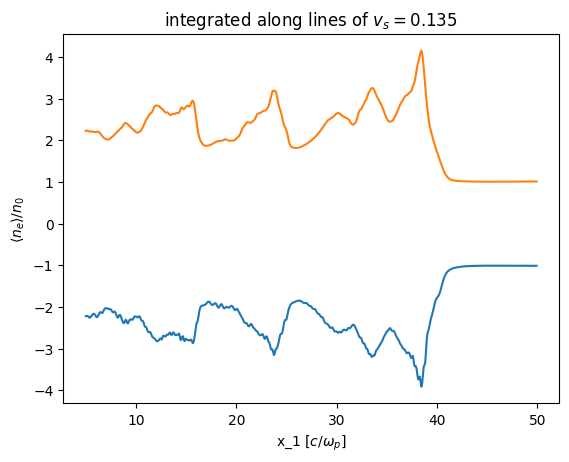

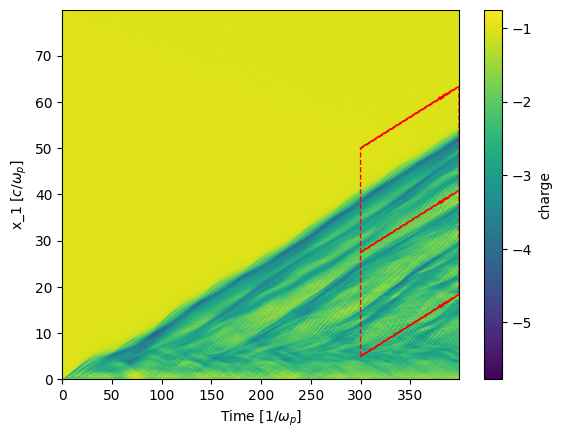

In [11]:
plot_quantity(e_density_,xmin = xmin, xmax = xmax, v=v, x = x, dx = dx, q_0 = e_density_0)
plot_quantity(i_density_,xmin = xmin, xmax = xmax, v=v, x = x, dx = dx, q_0 = i_density_0)
plt.ylabel(r'$\langle n_e \rangle /n_0$')

illustrate_box(q=e_density,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax, v= v, q_0 = e_density_0)

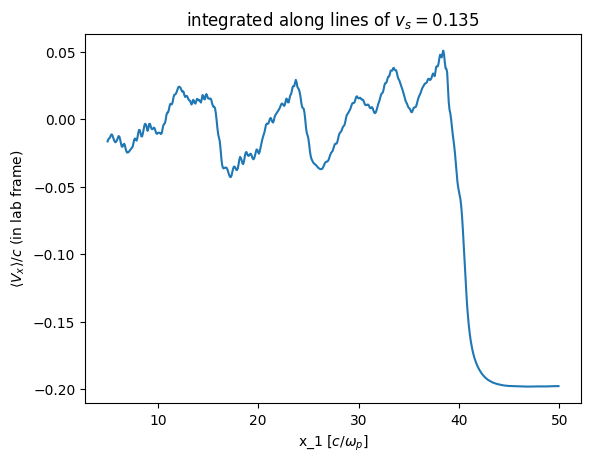

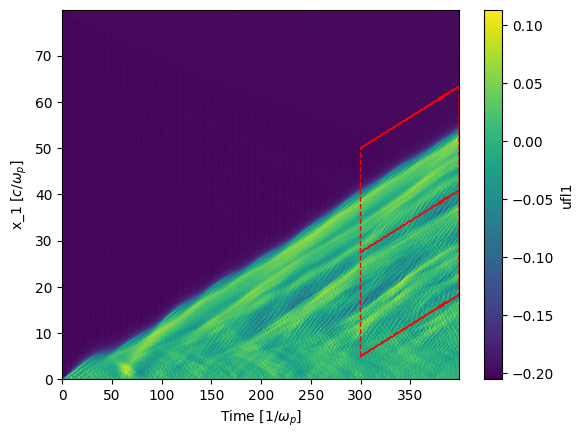

In [12]:

# positron_density_integrated = box_integrate(q=p_density,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=p_density_0, plot_flag=True)

plot_quantity(e_ufl1_,xmin = xmin, xmax = xmax, v=v, x = x, dx = dx, q_0 = e_ufl1_0)
plt.ylabel(r'$\langle V_x \rangle /c$ (in lab frame)')
illustrate_box(q=e_ufl1,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax, v= v, q_0 = e_ufl1_0)

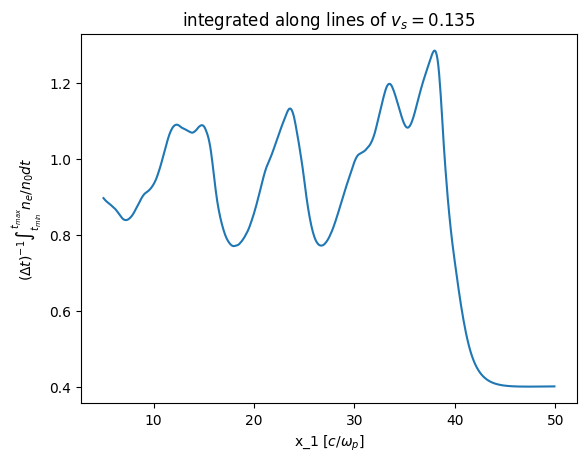

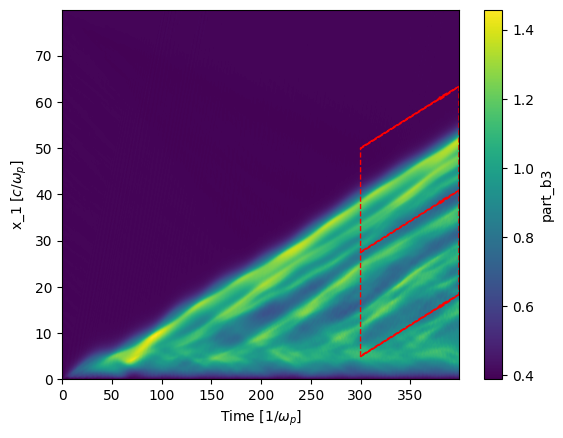

In [13]:
plot_quantity(b3_,xmin = xmin, xmax = xmax, v=v, x = x, dx = dx, q_0 = b3_0)
# plt.legend()
plt.ylabel('$(\Delta t)^{-1}\int_{t_{min}}^{t_{max}} n_e/n_0 dt$')

illustrate_box(q=b3,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax, v= v, q_0 = b3_0)

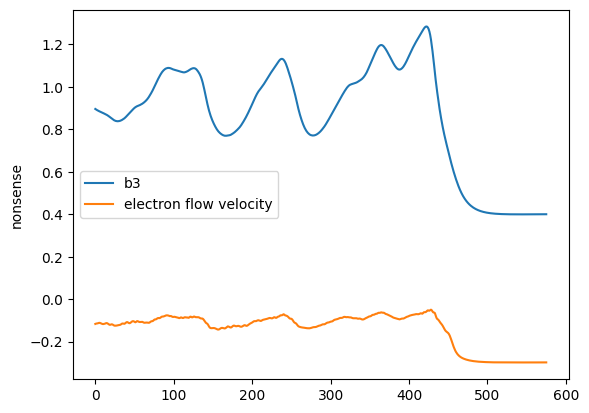

In [14]:
plt.plot(b3_, label = 'b3')
# plt.plot(positron_density_integrated, label = 'density')
plt.plot(((-0.1)+e_ufl1_), label = "electron flow velocity")
plt.ylabel("nonsense")
plt.legend()

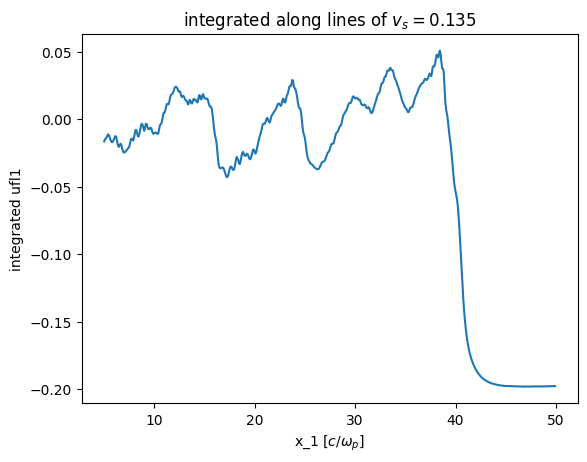

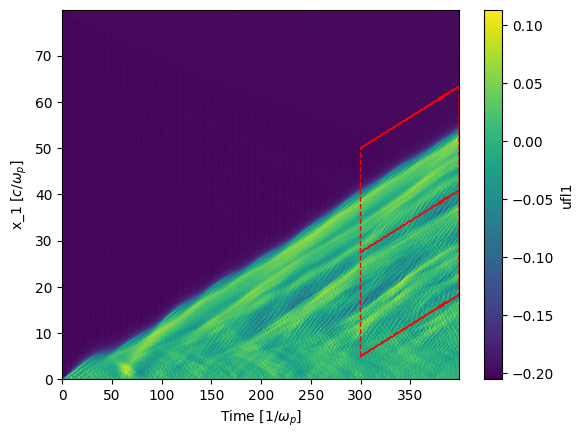

In [11]:
plot_quantity(e_ufl1_,xmin = xmin, xmax = xmax, v=v, x = x, dx = dx, q_0 = e_ufl1_0)

illustrate_box(q=e_ufl1,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=e_ufl1_0)

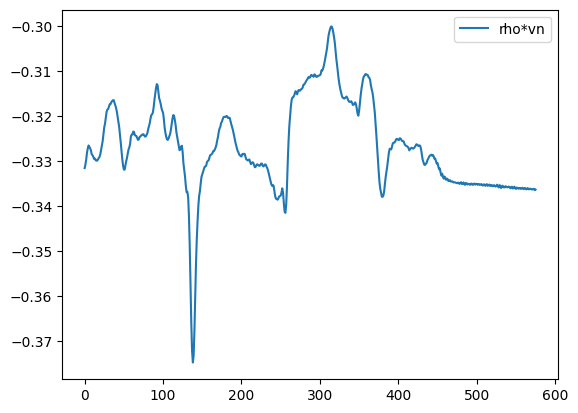

In [15]:
plt.plot((-v+i_ufl1_)*i_density_, label = "rho*vn")
# plt.plot((-0.1+e_ufl_d), label = 'ufl')
# plt.plot(e_density_, label = 'density')
plt.legend()

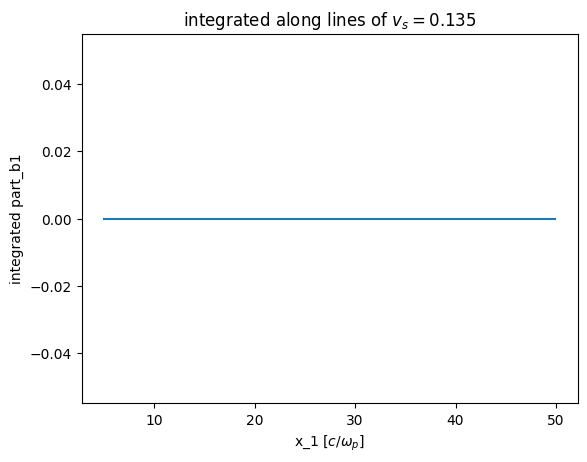

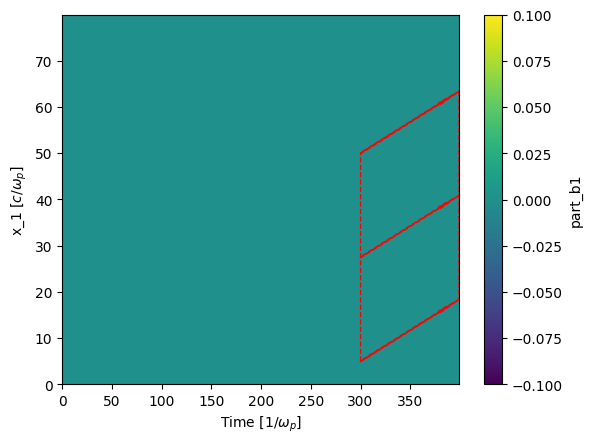

In [13]:
plot_quantity(b1_,xmin = xmin, xmax = xmax, v=v, x = x, dx = dx, q_0 = b1_0)

illustrate_box(q=b1,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=b1_0)

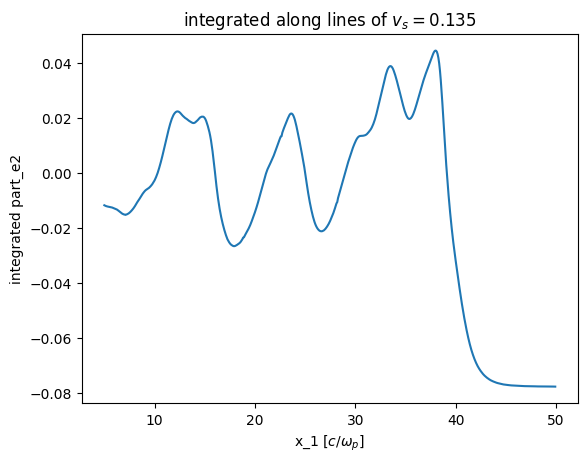

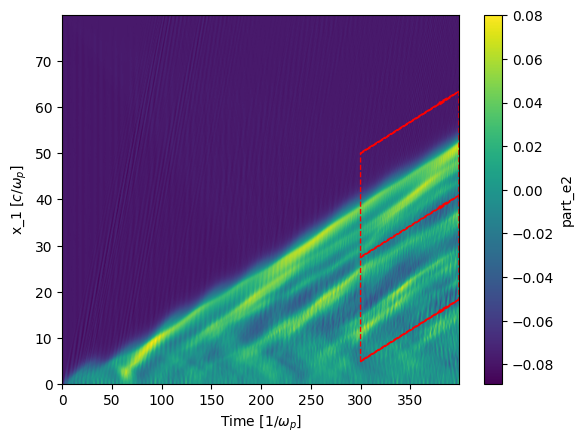

In [14]:
plot_quantity(e2_,xmin = xmin, xmax = xmax, v=v, x = x, dx = dx, q_0 = e2_0)

illustrate_box(q=e2,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=e2_0)

It looks like the tangential E field is not continuous... let's try transforming it

In [15]:
def field_transform(v: float, e_: np.array, b_: np.array):
    gamma = 1/np.sqrt(1-v**2)

    e1 = e_[0]
    b1 = b_[0]
    # I flipped the signs...
    e2 = gamma*(e_[1] - v*b_[2])
    b2 = gamma*(b_[1] + v*e_[2])

    e3 = gamma*(e_[2] + v*b_[1])
    b3 = gamma*(b_[2] - v*e_[1])
    return [e1,e2,e3], [b1,b2,b3]

eprime, bprime = field_transform(v= v,e_=[e1[0],e2[0],e3[0]],b_=[b1[0],b2[0],b3[0]])

/home/david/schaeffer/massratio10_B.4/../vysxd/transform.py:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  soln = scipy.integrate.quad(lambda t: 1/(t1-t0)*q_f([t, v*(t-t0)+x0]),t0,t1)


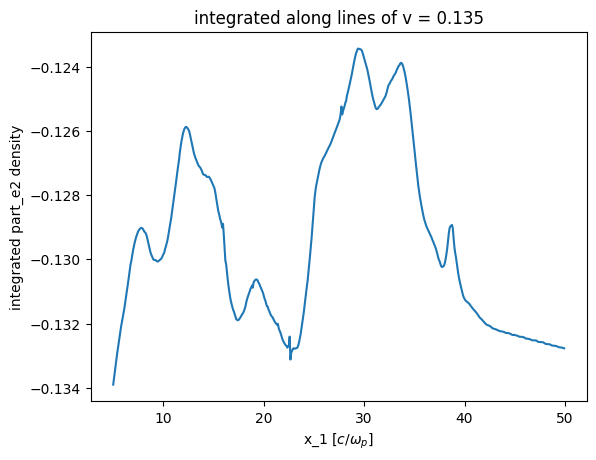

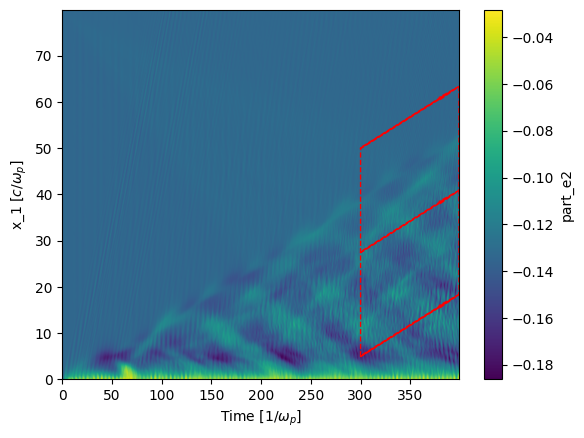

In [16]:
e2_ = box_integrate(q=[eprime[1],e2[1],e2[2],e2[3],e2[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=e2_0)

illustrate_box(q=[eprime[1],e2[1],e2[2],e2[3],e2[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=e2_0)

That did not fix it, let's see if $[v \times B]_{T}$ is continuous

/home/david/schaeffer/massratio10_B.4/../vysxd/transform.py:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  soln = scipy.integrate.quad(lambda t: 1/(t1-t0)*q_f([t, v*(t-t0)+x0]),t0,t1)


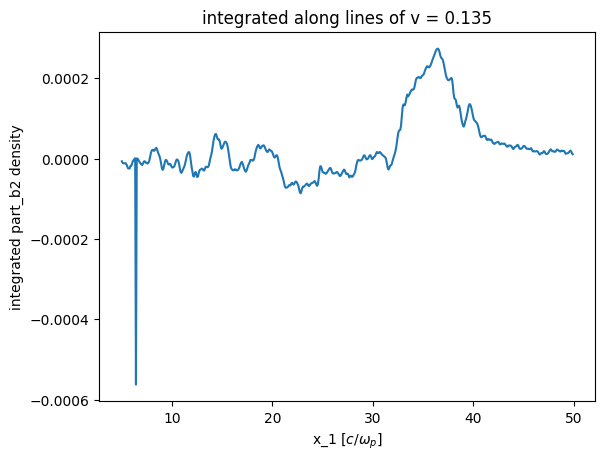

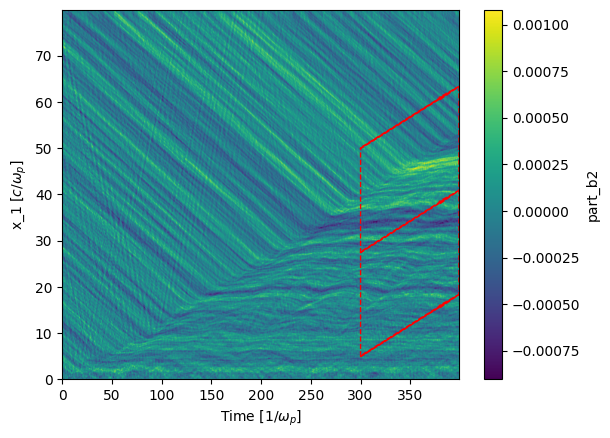

In [17]:
b2_ = box_integrate(q=[bprime[1],b2[1],b2[2],b2[3],b2[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=b2_0)

illustrate_box(q=[bprime[1],b2[1],b2[2],b2[3],b2[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=b2_0)

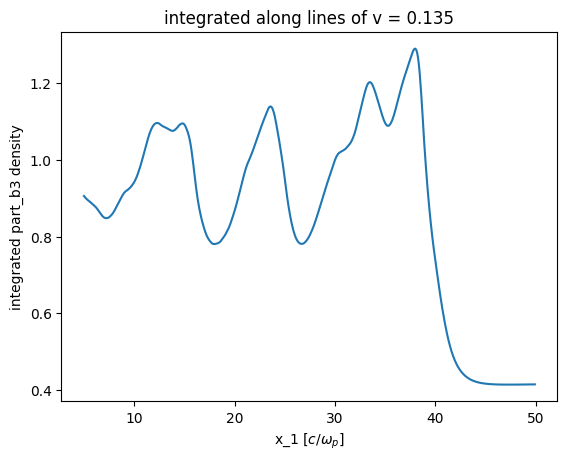

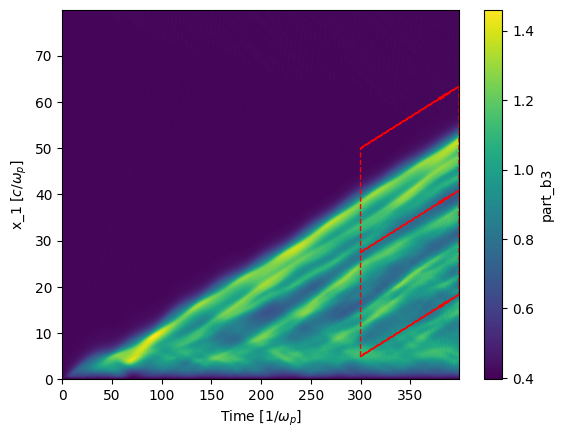

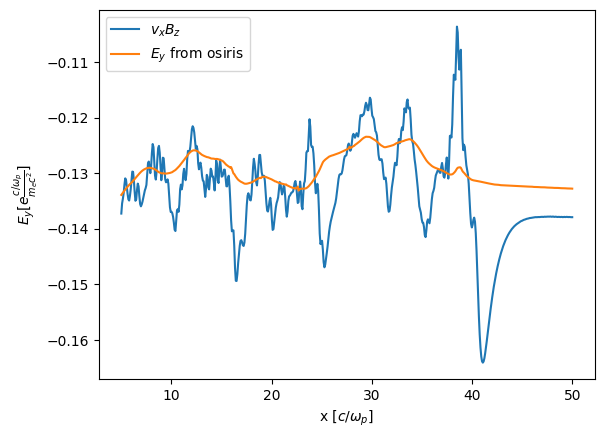

In [18]:
b3_ = box_integrate(q=[bprime[2],b3[1],b3[2],b3[3],b3[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=b3_0)

illustrate_box(q=[bprime[2],b3[1],b3[2],b3[3],b3[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=b3_0)

plt.plot(np.linspace(xmin,xmax, len(b3_)), np.multiply((-v+e_ufl1_),b3_),label= "$v_x B_z$")
plt.plot(np.linspace(xmin,xmax, len(b3_)), e2_, label = '$E_y$ from osiris')
plt.xlabel('x $[c/\omega_p]$')
plt.ylabel(r'$E_y [e \frac{c / \omega_p}{m_e c^2}]$')
plt.legend()


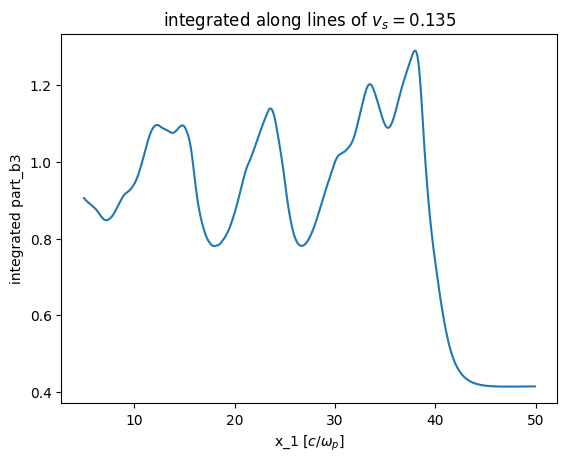

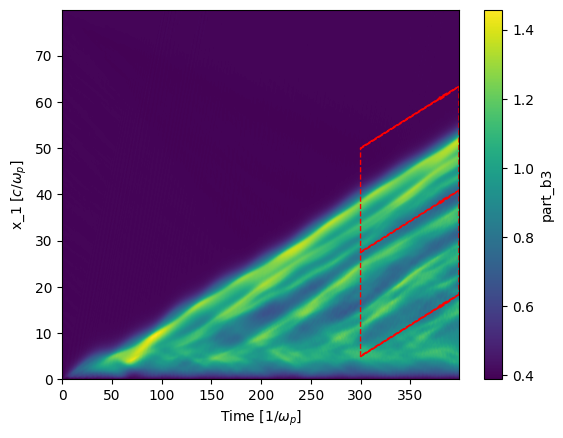

In [19]:
## B_3 should directly show our shock front, and it looks like it does

plot_quantity(b3_,xmin = xmin, xmax = xmax, v=v, x = x, dx = dx, q_0 = b3_0)

illustrate_box(q=b3,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=b3_0)

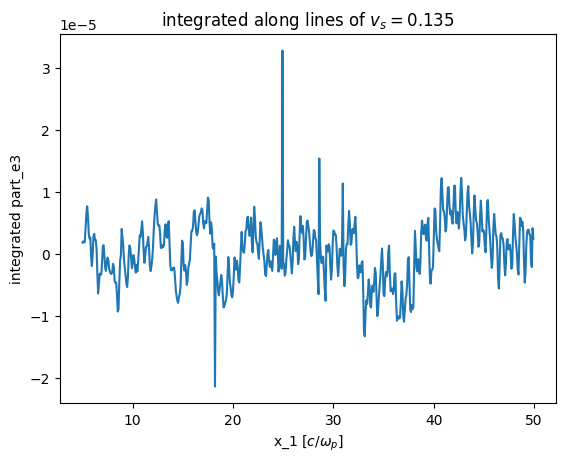

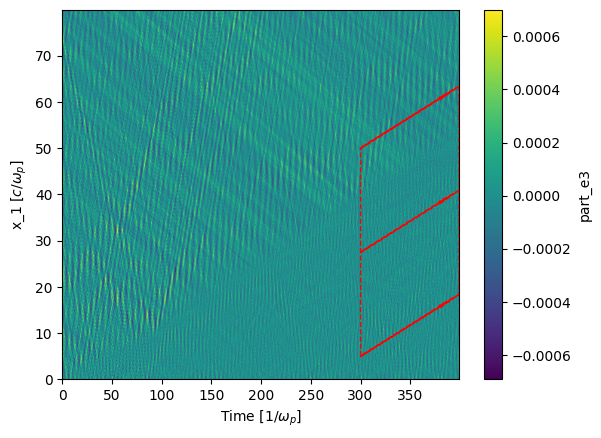

In [20]:
plot_quantity(e3_,xmin = xmin, xmax = xmax, v=v, x = x, dx = dx, q_0 = e3_0)

illustrate_box(q=e3,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=e3_0)

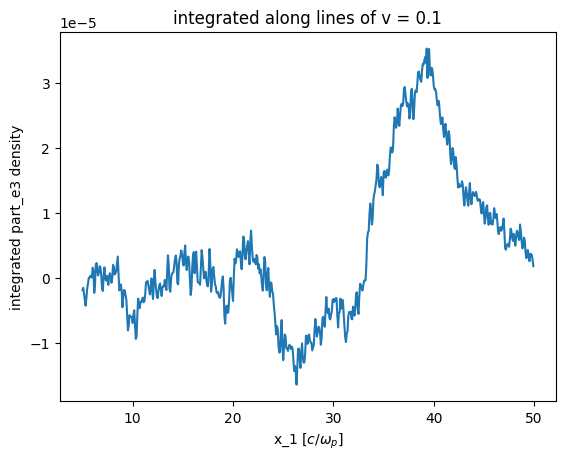

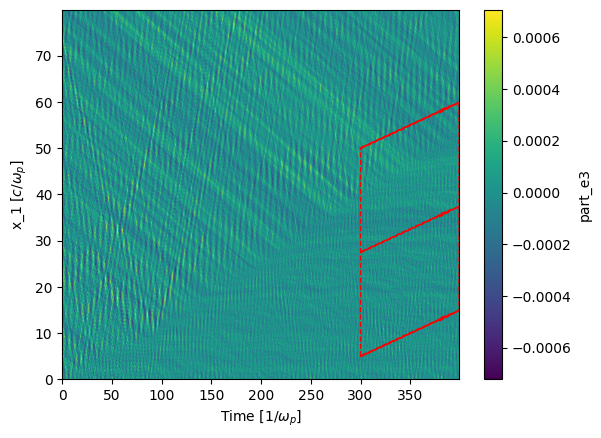

In [21]:
e3_prime_integrated = box_integrate(q=[eprime[2],e3[1],e3[2],e3[3],e3[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = .1, q_0=e3_0)

illustrate_box(q=[eprime[2],e3[1],e3[2],e3[3],e3[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = .1, q_0=e3_0)

Let's do the third jump condition here

$${\displaystyle {\begin{cases}\rho _{1}v_{1\perp }=\rho _{2}v_{2\perp },\\[1.2ex]B_{1\perp }=B_{2\perp },\\[1.2ex]\rho _{1}v_{1\perp }^{2}+p_{1}+{\frac {1}{2\mu _{0}}}B_{1\parallel }^{2}=\rho _{2}v_{2\perp }^{2}+p_{2}+{\frac {1}{2\mu _{0}}}B_{2\parallel }^{2},\\[1.2ex]\rho _{1}v_{1\perp }\mathbf {v} _{1\parallel }-{\frac {1}{\mu _{0}}}\mathbf {B} _{1\parallel }B_{1\perp }=\rho _{2}v_{2\perp }\mathbf {v} _{2\parallel }-{\frac {1}{\mu _{0}}}\mathbf {B} _{2\parallel }B_{2\perp },\\[1.2ex]\displaystyle \left({\frac {\gamma }{\gamma -1}}{\frac {p_{1}}{\rho _{1}}}+{\frac {v_{1}^{2}}{2}}\right)\rho _{1}v_{1\perp }+{\frac {1}{\mu _{0}}}\left[{v_{1\perp }B_{1\parallel }^{2}}-{B_{1\perp }(\mathbf {B} _{1\parallel }\cdot \mathbf {v} _{1\parallel })}\right]=\left({\frac {\gamma }{\gamma -1}}{\frac {p_{2}}{\rho _{2}}}+{\frac {v_{2}^{2}}{2}}\right)\rho _{2}v_{2\perp }+{\frac {1}{\mu _{0}}}\left[{v_{2\perp }B_{2\parallel }^{2}}-{B_{2\perp }(\mathbf {B} _{2\parallel }\cdot \mathbf {v} _{2\parallel })}\right],\\[1.2ex](\mathbf {v} \times \mathbf {B} )_{1\parallel }=(\mathbf {v} \times \mathbf {B} )_{2\parallel },\end{cases}}}$$

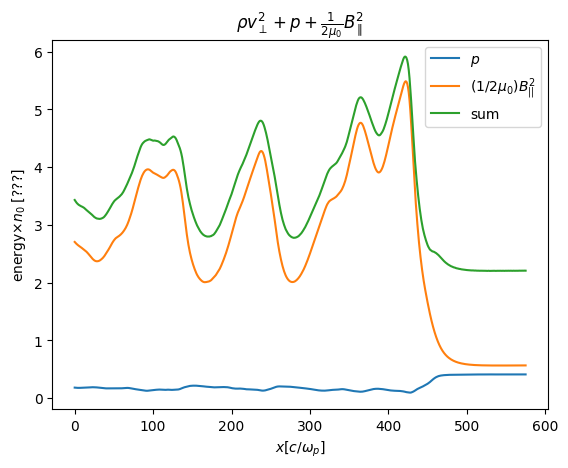

In [33]:
## Find kinetic energy as a function of space
kinetic_ene = (1/2)*(np.multiply((10*i_density_),np.square(-v+i_ufl1_))+ np.multiply((-1*e_density_),np.square(-v+e_ufl1_))) # This does not include thermal velocity... or does it?
pressure = (2/3)*kinetic_ene

plt.plot(pressure, label = r'$p$')
fitting_const = 1 # One would think that this should be 1, but answer looks correct we set it to be 200. Units?
RH_3 = np.multiply(10*i_density_, np.square(-v+i_ufl1_)) + np.multiply(-1*e_density_, np.square(-v+e_ufl1_))+ pressure + fitting_const/(2)*(np.square(b2_)+np.square(b3_)) ## finish this later

# plt.plot(np.multiply(i_density_, np.square(-v+i_ufl1_)), label = r"$\rho v_n^2$")

plt.plot(fitting_const/(2)*(np.square(b2_)+np.square(b3_)), label = r"$(1/2\mu_0) B_{||}^2$")
plt.plot(RH_3, label = 'sum')
plt.ylabel(r"energy$\times  n_0$ [???]")
plt.xlabel(r"$x [c/\omega_p]$")
plt.title(r"$\rho v_{\perp}^{2}+p+{\frac {1}{2\mu _{0}}}B_{\parallel }^{2}$")
plt.legend()

In [23]:
RH_4 = 2*e_density_*e_ufl1_*e_ufl2_ - np.multiply(b1_,b2_)
plt.plot(2*e_density_*e_ufl1_*e_ufl2_, label = r"$\rho v_x v_y$")
plt.plot(np.multiply(b1_,b2_), label = r"$\frac{1}{4 \pi} (B_{||}^2)$")
plt.plot(RH_4, label = 'sum')
plt.ylim(-5e-4,5e-4)
plt.legend()

NameError: name 'e_ufl2_' is not defined

In [29]:
np.mean(10*i_density_,-1*e_density_)

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
# Remember, p1x1[0] has the shape [t of len 526, v of len 512, x of len 1024]
p1x1 = get_osiris_quantity_2d('data/MS/PHA/p1x1/electrons/')
t_phase = p1x1[4]
x_phase = p1x1[5]
v_phase = p1x1[6] 
vsquared = np.square(v_phase)
# print(np.shape(v_squared_arr))98y7u66666
vsquared_arr = np.array([np.transpose([vsquared]*len(x_phase))]*len(t_phase)) # jesus christ this line is a mess
v_arr = np.array([np.transpose([v_phase]*len(x_phase))]*len(t_phase))
print(np.shape(vsquared_arr))
print(np.shape(p1x1[0]))


(526, 512, 1024)
(526, 512, 1024)


In [16]:
second_moment = np.multiply(vsquared_arr,p1x1[0])

In [17]:
first_moment = np.multiply(v_arr,p1x1[0])

: 

In [1]:
v_arr

NameError: name 'v_arr' is not defined

In [ ]:

second_moment_integrated = np.trapz(second_moment, axis = 1)
first_moment_integrated = np.trapz(first_moment,axis = 1)
zeroth_moment_integrated = np.trapz(p1x1[0], axis=1)

pressure = second_moment_integrated -2*np.multiply(e_ufl1[0],first_moment_integrated) + np.multiply(np.square(e_ufl1[0]),zeroth_moment_integrated)
print(np.shape(pressure))

def get_pressure():
    pass

In [99]:
print(np.shape(np.transpose([e_ufl1[0]]*len(v_phase))))
print(np.shape(pressure))
print(np.shape(t))
print(np.shape(x))

(1024, 526, 512)
(526, 1024)
(526,)
(1024,)


/home/david/schaeffer/massratio10_B.4/../vysxd/transform.py:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  soln = scipy.integrate.quad(lambda t: 1/(t1-t0)*q_f([t, v*(t-t0)+x0]),t0,t1)


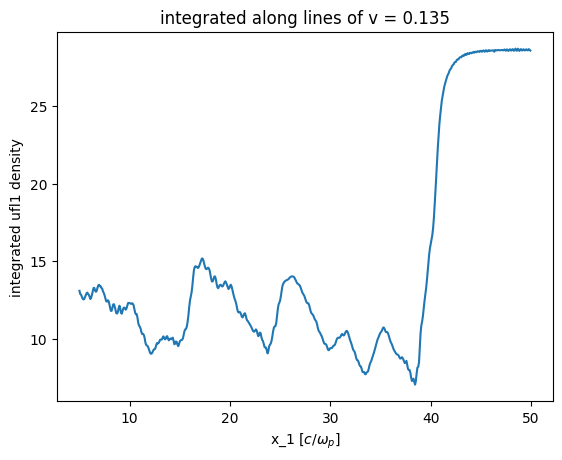

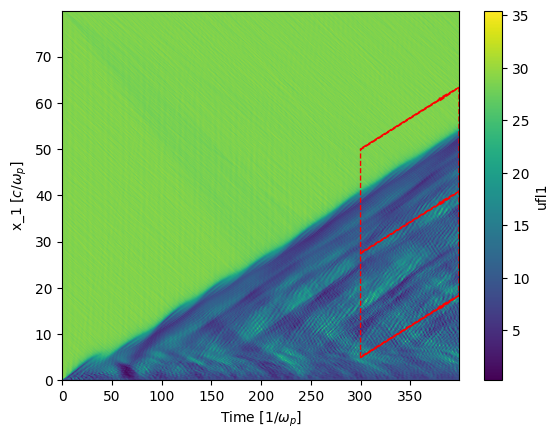

In [14]:
pressure_ = box_integrate([pressure,dt, dx, t, x],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax, v= v,q_0=e_ufl1_0)
# plot_quantity(i_density_,xmin = xmin, xmax = xmax, v=v, x = x, dx = dx, q_0 = i_density_0)
# plt.ylabel(r'$\langle n_e \rangle /n_0$')

illustrate_box([pressure, dt, dx, t, x],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax, v= v,q_0=e_ufl1_0)

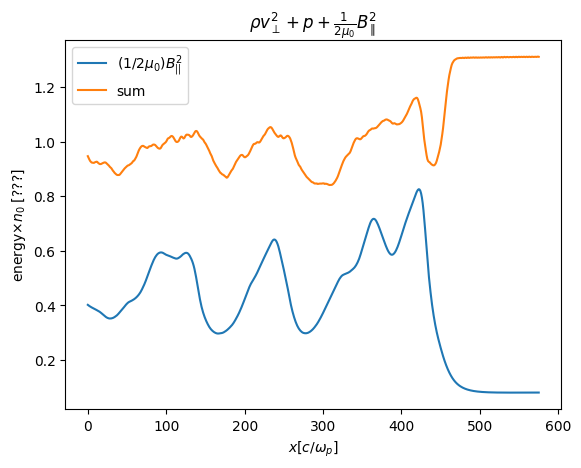

In [13]:
## Find kinetic energy as a function of space
# kinetic_ene = (1/2)*(np.multiply((10*i_density_),np.square(-v+i_ufl1_))+ np.multiply((-1*e_density_),np.square(-v+e_ufl1_))) # This does not include thermal velocity... or does it?
# pressure = (2/3)*kinetic_ene

# plt.plot(pressure, label = r'$p$')
fitting_const = 1 # One would think that this should be 1, but answer looks correct we set it to be 200. Units?
RH_3 = np.multiply(10*i_density_, np.square(-v+i_ufl1_)) + np.multiply(-1*e_density_, np.square(-v+e_ufl1_))+ fitting_const/(2)*(np.square(b2_)+np.square(b3_)) ## finish this later
# RH_3 = pressure_ + fitting_const/(2)*(np.square(b2_)+np.square(b3_)) ## finish this later

# plt.plot(np.multiply(i_density_, np.square(-v+i_ufl1_)), label = r"$\rho v_n^2$")

plt.plot(fitting_const/(2)*(np.square(b2_)+np.square(b3_)), label = r"$(1/2\mu_0) B_{||}^2$")
plt.plot(RH_3, label = 'sum')
plt.ylabel(r"energy$\times  n_0$ [???]")
plt.xlabel(r"$x [c/\omega_p]$")
plt.title(r"$\rho v_{\perp}^{2}+p+{\frac {1}{2\mu _{0}}}B_{\parallel }^{2}$")
plt.legend()